In [162]:
#!pip install scikit-learn
import sys
!{sys.executable} -m pip install scikit-learn

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [163]:
import csv
!pip install scikit-learn
!pip install pandas
!pip install seaborn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [164]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [165]:
NUM_CLASSES = 14

# 学習データ読み込み

In [166]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [167]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [169]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [170]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_14 (Dropout)        (None, 42)                0         
                                                                 
 dense_21 (Dense)            (None, 20)                860       
                                                                 
 dropout_15 (Dropout)        (None, 20)                0         
                                                                 
 dense_22 (Dense)            (None, 10)                210       
                                                                 
 dense_23 (Dense)            (None, 14)                154       
                                                                 
Total params: 1224 (4.78 KB)
Trainable params: 1224 (4.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [171]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [172]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [173]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
128/168 [=====================>........] - ETA: 0s - loss: 2.4319 - accuracy: 0.1784 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
168/168 [==============================] - 0s 944us/step - loss: 2.3550 - accuracy: 0.2099 - val_loss: 1.8736 - val_accuracy: 0.4979
Epoch 2/1000
125/168 [=====================>........] - ETA: 0s - loss: 1.8557 - accuracy: 0.3853
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
168/168 [==============================] - 0s 591us/step - loss: 1.8079 - accuracy: 0.3974 - val_loss: 1.3479 - val_accuracy: 0.6168
Epoch 3/1000
128/168 [=====================>........] - ETA: 0s - loss: 1.5305 - accuracy: 0.4709
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


168/168 [==============================] - 0s 579us/step - loss: 1.5115 - accuracy: 0.4750 - val_loss: 1.1008 - val_accuracy: 0.7091
Epoch 4/1000
130/168 [======================>.......] - ETA: 0s - loss: 1.3778 - accuracy: 0.5163
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
168/168 [==============================] - 0s 548us/step - loss: 1.3679 - accuracy: 0.5172 - val_loss: 0.9291 - val_accuracy: 0.7457
Epoch 5/1000
138/168 [=======================>......] - ETA: 0s - loss: 1.2715 - accuracy: 0.5420
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
168/168 [==============================] - 0s 538us/step - loss: 1.2642 - accuracy: 0.5477 - val_loss: 0.8111 - val_accuracy: 0.7894
Epoch 6/1000
133/168 [======================>.......] - ETA: 0s - loss: 1.1887 - accuracy: 0.5770
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
168/168 [==============================] - 0s 550us/step - loss: 1.1829 - accur

In [174]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

56/56 [==============================] - 0s 289us/step - loss: 0.3536 - accuracy: 0.9193


In [175]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [176]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 22ms/step
[1.7338808e-06 1.5987702e-02 2.9364950e-04 3.1388341e-03 4.4648026e-04
 5.3474307e-04 6.1034447e-01 1.1922931e-07 4.8005478e-15 1.0457601e-06
 5.1548882e-10 1.9614700e-04 3.6905470e-01 3.4618139e-07]
6


# 混同行列


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
224/224 [==============================] - 0s 248us/step


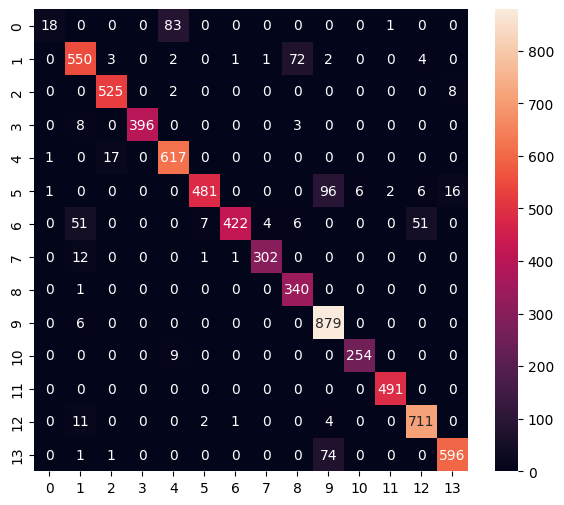

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.18      0.30       102
           1       0.86      0.87      0.86       635
           2       0.96      0.98      0.97       535
           3       1.00      0.97      0.99       407
           4       0.87      0.97      0.92       635
           5       0.98      0.79      0.88       608
           6       0.99      0.78      0.87       541
           7       0.98      0.96      0.97       316
           8       0.81      1.00      0.89       341
           9       0.83      0.99      0.91       885
          10       0.98      0.97      0.97       263
          11       0.99      1.00      1.00       491
          12       0.92      0.98      0.95       729
          13       0.96      0.89      0.92       672

    accuracy                           0.92      7160
   macro avg       0.93      0.88      0.88      7160
weighted avg       0.93      0.92      0.92      7160



In [177]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [178]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [179]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpjulae2za/assets


INFO:tensorflow:Assets written to: /var/folders/94/hsp1l41x2bl2x750txjrn_900000gn/T/tmpjulae2za/assets
2024-04-07 17:10:23.223562: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-04-07 17:10:23.223575: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 6, Total Ops 13, % non-converted = 46.15 %
 * 6 ARITH ops

- arith.constant:    6 occurrences  (f32: 6)



  (f32: 3)
  (f32: 1)


7048

# 推論テスト

In [180]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [181]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [182]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [183]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 123 µs, sys: 70 µs, total: 193 µs
Wall time: 157 µs


In [184]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.7338824e-06 1.5987677e-02 2.9364962e-04 3.1388337e-03 4.4648044e-04
 5.3474307e-04 6.1034441e-01 1.1922944e-07 4.8005292e-15 1.0457580e-06
 5.1548776e-10 1.9614719e-04 3.6905476e-01 3.4618100e-07]
6
